# Loading the dataset

In [2]:
# For Dataset loading and preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For data preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models Importing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR

# For Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, plot_confusion_matrix, precision_score, recall_score,r2_score, mean_squared_error, f1_score
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('CDC_clean.csv')
df.head()

,Seq No.,Status,Gender,Age,Race,Country of Birth,Citizenship Status,Educational Qualification,Marital Status,Number of people in Household,Children in Household,Adults in Household,Elderly in Household,Household Income
0,83732.0,2.0,1.0,62.0,3.0,1.0,1.0,5.0,1.0,2.0,0.0,0.0,1.0,10.0
1,83733.0,2.0,1.0,53.0,3.0,2.0,2.0,3.0,3.0,1.0,0.0,0.0,0.0,4.0
2,83734.0,2.0,1.0,78.0,3.0,1.0,1.0,3.0,1.0,2.0,0.0,0.0,2.0,5.0
3,83735.0,2.0,2.0,56.0,3.0,1.0,1.0,5.0,6.0,1.0,0.0,0.0,0.0,10.0
4,83736.0,2.0,2.0,42.0,4.0,1.0,1.0,4.0,3.0,5.0,0.0,2.0,0.0,7.0


# **Dataframe Information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508 entries, 0 to 5507
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Seq No.                        5508 non-null   float64
 1   Status                         5508 non-null   float64
 2   Gender                         5508 non-null   float64
 3   Age                            5508 non-null   float64
 4   Race                           5508 non-null   float64
 5   Country of Birth               5508 non-null   float64
 6   Citizenship Status             5508 non-null   float64
 7   Educational Qualification      5508 non-null   float64
 8   Marital Status                 5508 non-null   float64
 9   Number of people in Household  5508 non-null   float64
 10  Children in Household          5508 non-null   float64
 11  Adults in Household            5508 non-null   float64
 12  Elderly in Household           5508 non-null   f

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Seq No.,5508.0,88684.154503,2874.961610,83732.0,86189.75,88664.5,91168.75,93702.0
Status,5508.0,1.962237,0.190640,1.0,2.00,2.0,2.00,2.0
Gender,5508.0,1.521060,0.499602,1.0,1.00,2.0,2.00,2.0
Age,5508.0,49.568809,17.754735,20.0,34.00,49.0,64.00,80.0
Race,5508.0,3.229121,1.619567,1.0,2.00,3.0,4.00,7.0
Country of Birth,5508.0,1.337691,0.472965,1.0,1.00,1.0,2.00,2.0
Citizenship Status,5508.0,1.184822,0.490300,1.0,1.00,1.0,1.00,9.0
Educational Qualification,5508.0,3.445534,1.311392,1.0,3.00,4.0,4.00,9.0
Marital Status,5508.0,2.643609,2.695267,1.0,1.00,1.0,5.00,99.0
Number of people in Household,5508.0,3.242012,1.714951,1.0,2.00,3.0,4.00,7.0


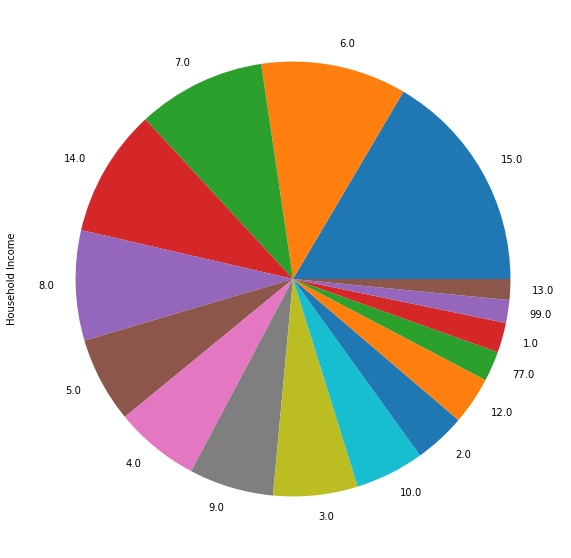

In [6]:
# Target "House hold income" column count of each values
df['Household Income'].value_counts().plot(kind = 'pie', figsize = (10,10))

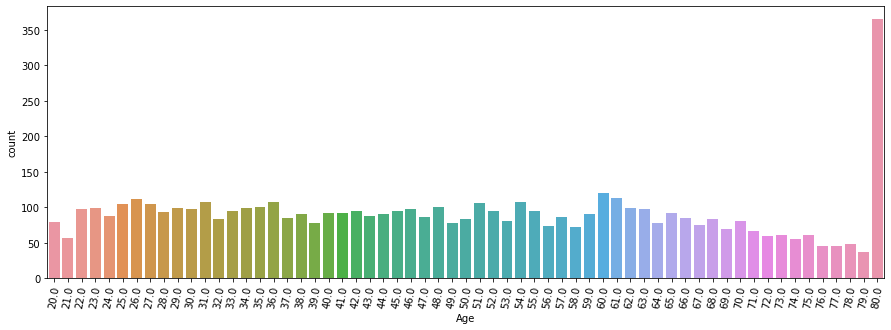

In [7]:
# Displaying the Age frequencies of different age group peoples
fig, ax  = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='Age', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);

[Text(0, 0, '1.0'), Text(0, 0, '2.0')]

[Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0')]

[Text(0, 0, '1.0'), Text(0, 0, '2.0')]

[Text(0, 0, '1.0'), Text(0, 0, '2.0'), Text(0, 0, '7.0'), Text(0, 0, '9.0')]

[Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '9.0')]

[Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '77.0'),
 Text(0, 0, '99.0')]

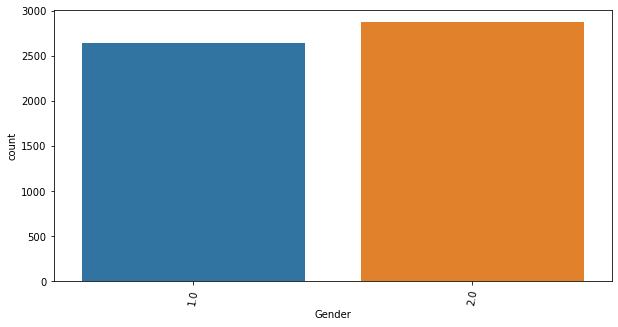

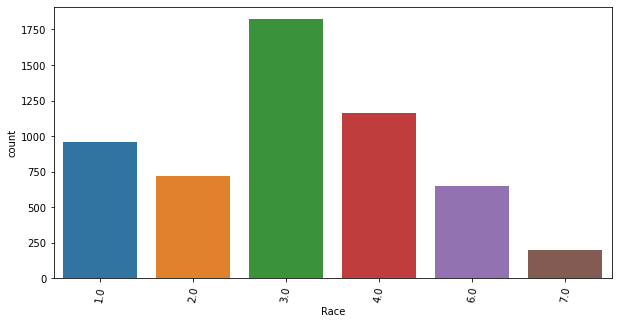

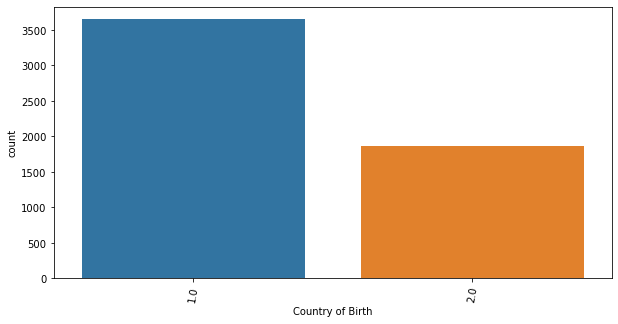

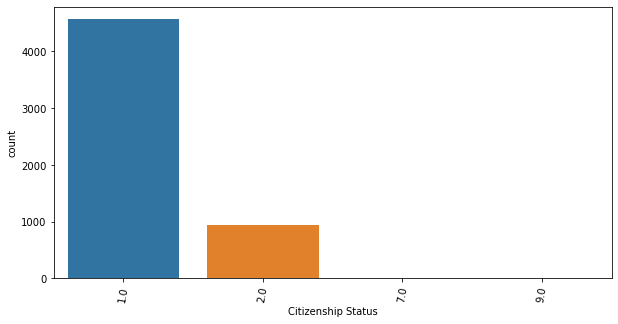

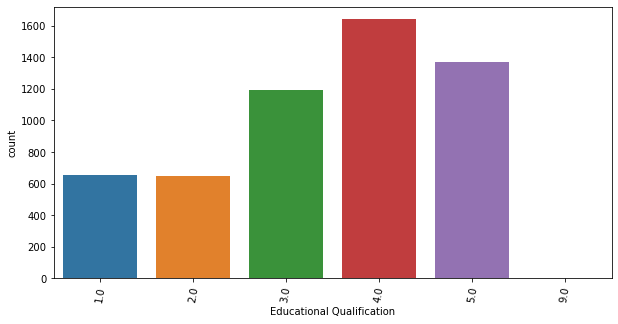

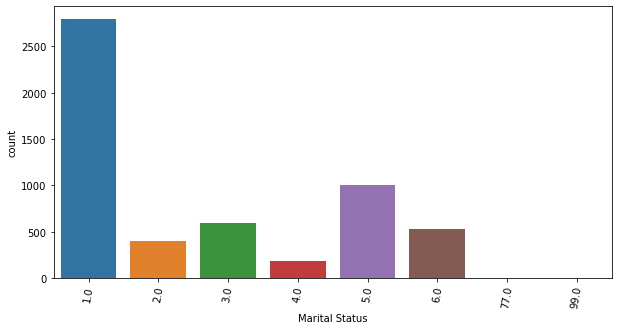

In [8]:
# Display the counts of all the categorical columns
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='Gender', data=df)
display(ax.set_xticklabels(ax.get_xticklabels(), rotation=80))

fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='Race', data=df)
display(ax.set_xticklabels(ax.get_xticklabels(), rotation=80))

fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='Country of Birth', data=df)
display(ax.set_xticklabels(ax.get_xticklabels(), rotation=80))

fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='Citizenship Status', data=df)
display(ax.set_xticklabels(ax.get_xticklabels(), rotation=80))

fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='Educational Qualification', data=df)
display(ax.set_xticklabels(ax.get_xticklabels(), rotation=80))

fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='Marital Status', data=df)
display(ax.set_xticklabels(ax.get_xticklabels(), rotation=80))

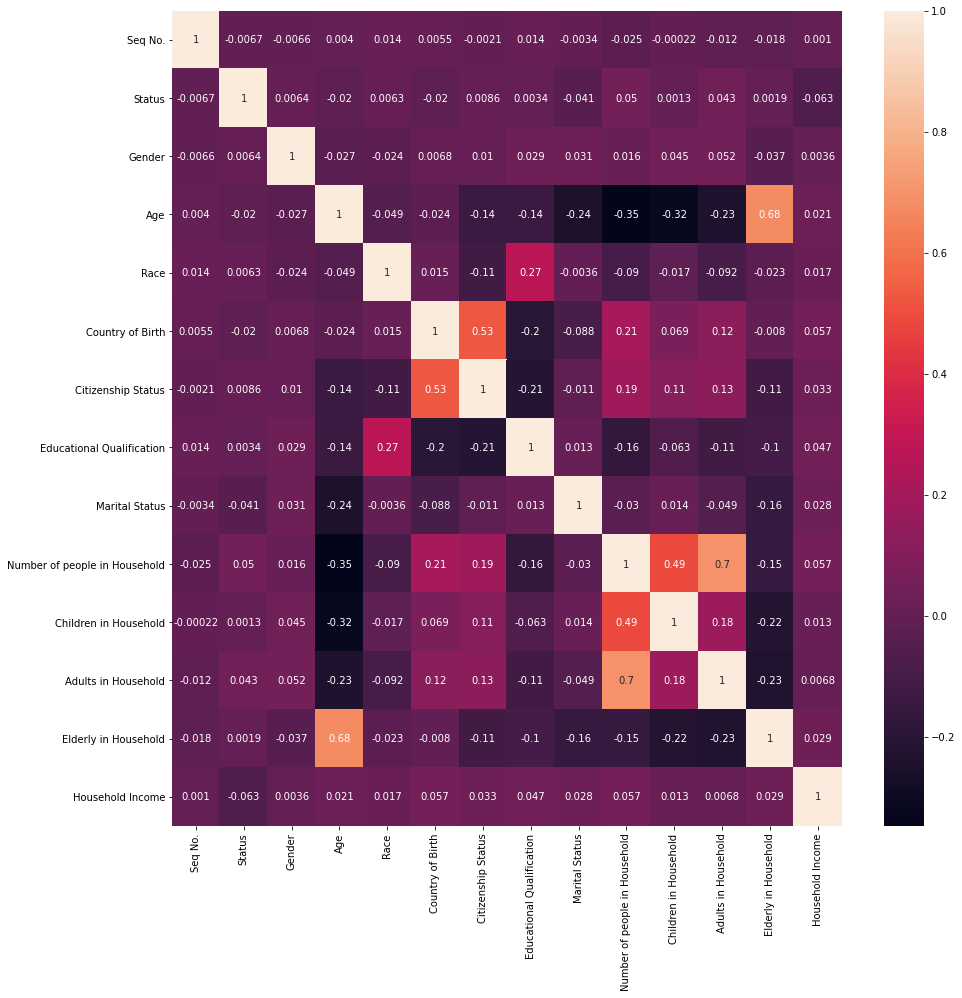

In [9]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot= True)

# **Applying Preprocessing**

In [10]:
# Dropping the sequence number column in the dataframe
df.drop('Seq No.' ,axis = 1, inplace = True)

# Converting all the columns type into integer
df = df.astype(int)

# Removing the Household columns values that are 99 and 77
df.drop(df.loc[df['Household Income'] == 99].index, inplace=True)
df.drop(df.loc[df['Household Income'] == 77].index, inplace=True)

# Removing the Martial Status columns values that are 99 and 77
df.drop(df.loc[df['Marital Status'] == 99].index, inplace=True)
df.drop(df.loc[df['Marital Status'] == 77].index, inplace=True)

# Removing the Citizen ship columns values that are 99 and 77
df.drop(df.loc[df['Citizenship Status'] == 9].index, inplace=True)
df.drop(df.loc[df['Citizenship Status'] == 7].index, inplace=True)

# Removing the Country of birth columns values that are 99 and 77
df.drop(df.loc[df['Country of Birth'] == 99].index, inplace=True)
df.drop(df.loc[df['Country of Birth'] == 77].index, inplace=True)

df.head()

,Status,Gender,Age,Race,Country of Birth,Citizenship Status,Educational Qualification,Marital Status,Number of people in Household,Children in Household,Adults in Household,Elderly in Household,Household Income
0,2,1,62,3,1,1,5,1,2,0,0,1,10
1,2,1,53,3,2,2,3,3,1,0,0,0,4
2,2,1,78,3,1,1,3,1,2,0,0,2,5
3,2,2,56,3,1,1,5,6,1,0,0,0,10
4,2,2,42,4,1,1,4,3,5,0,2,0,7


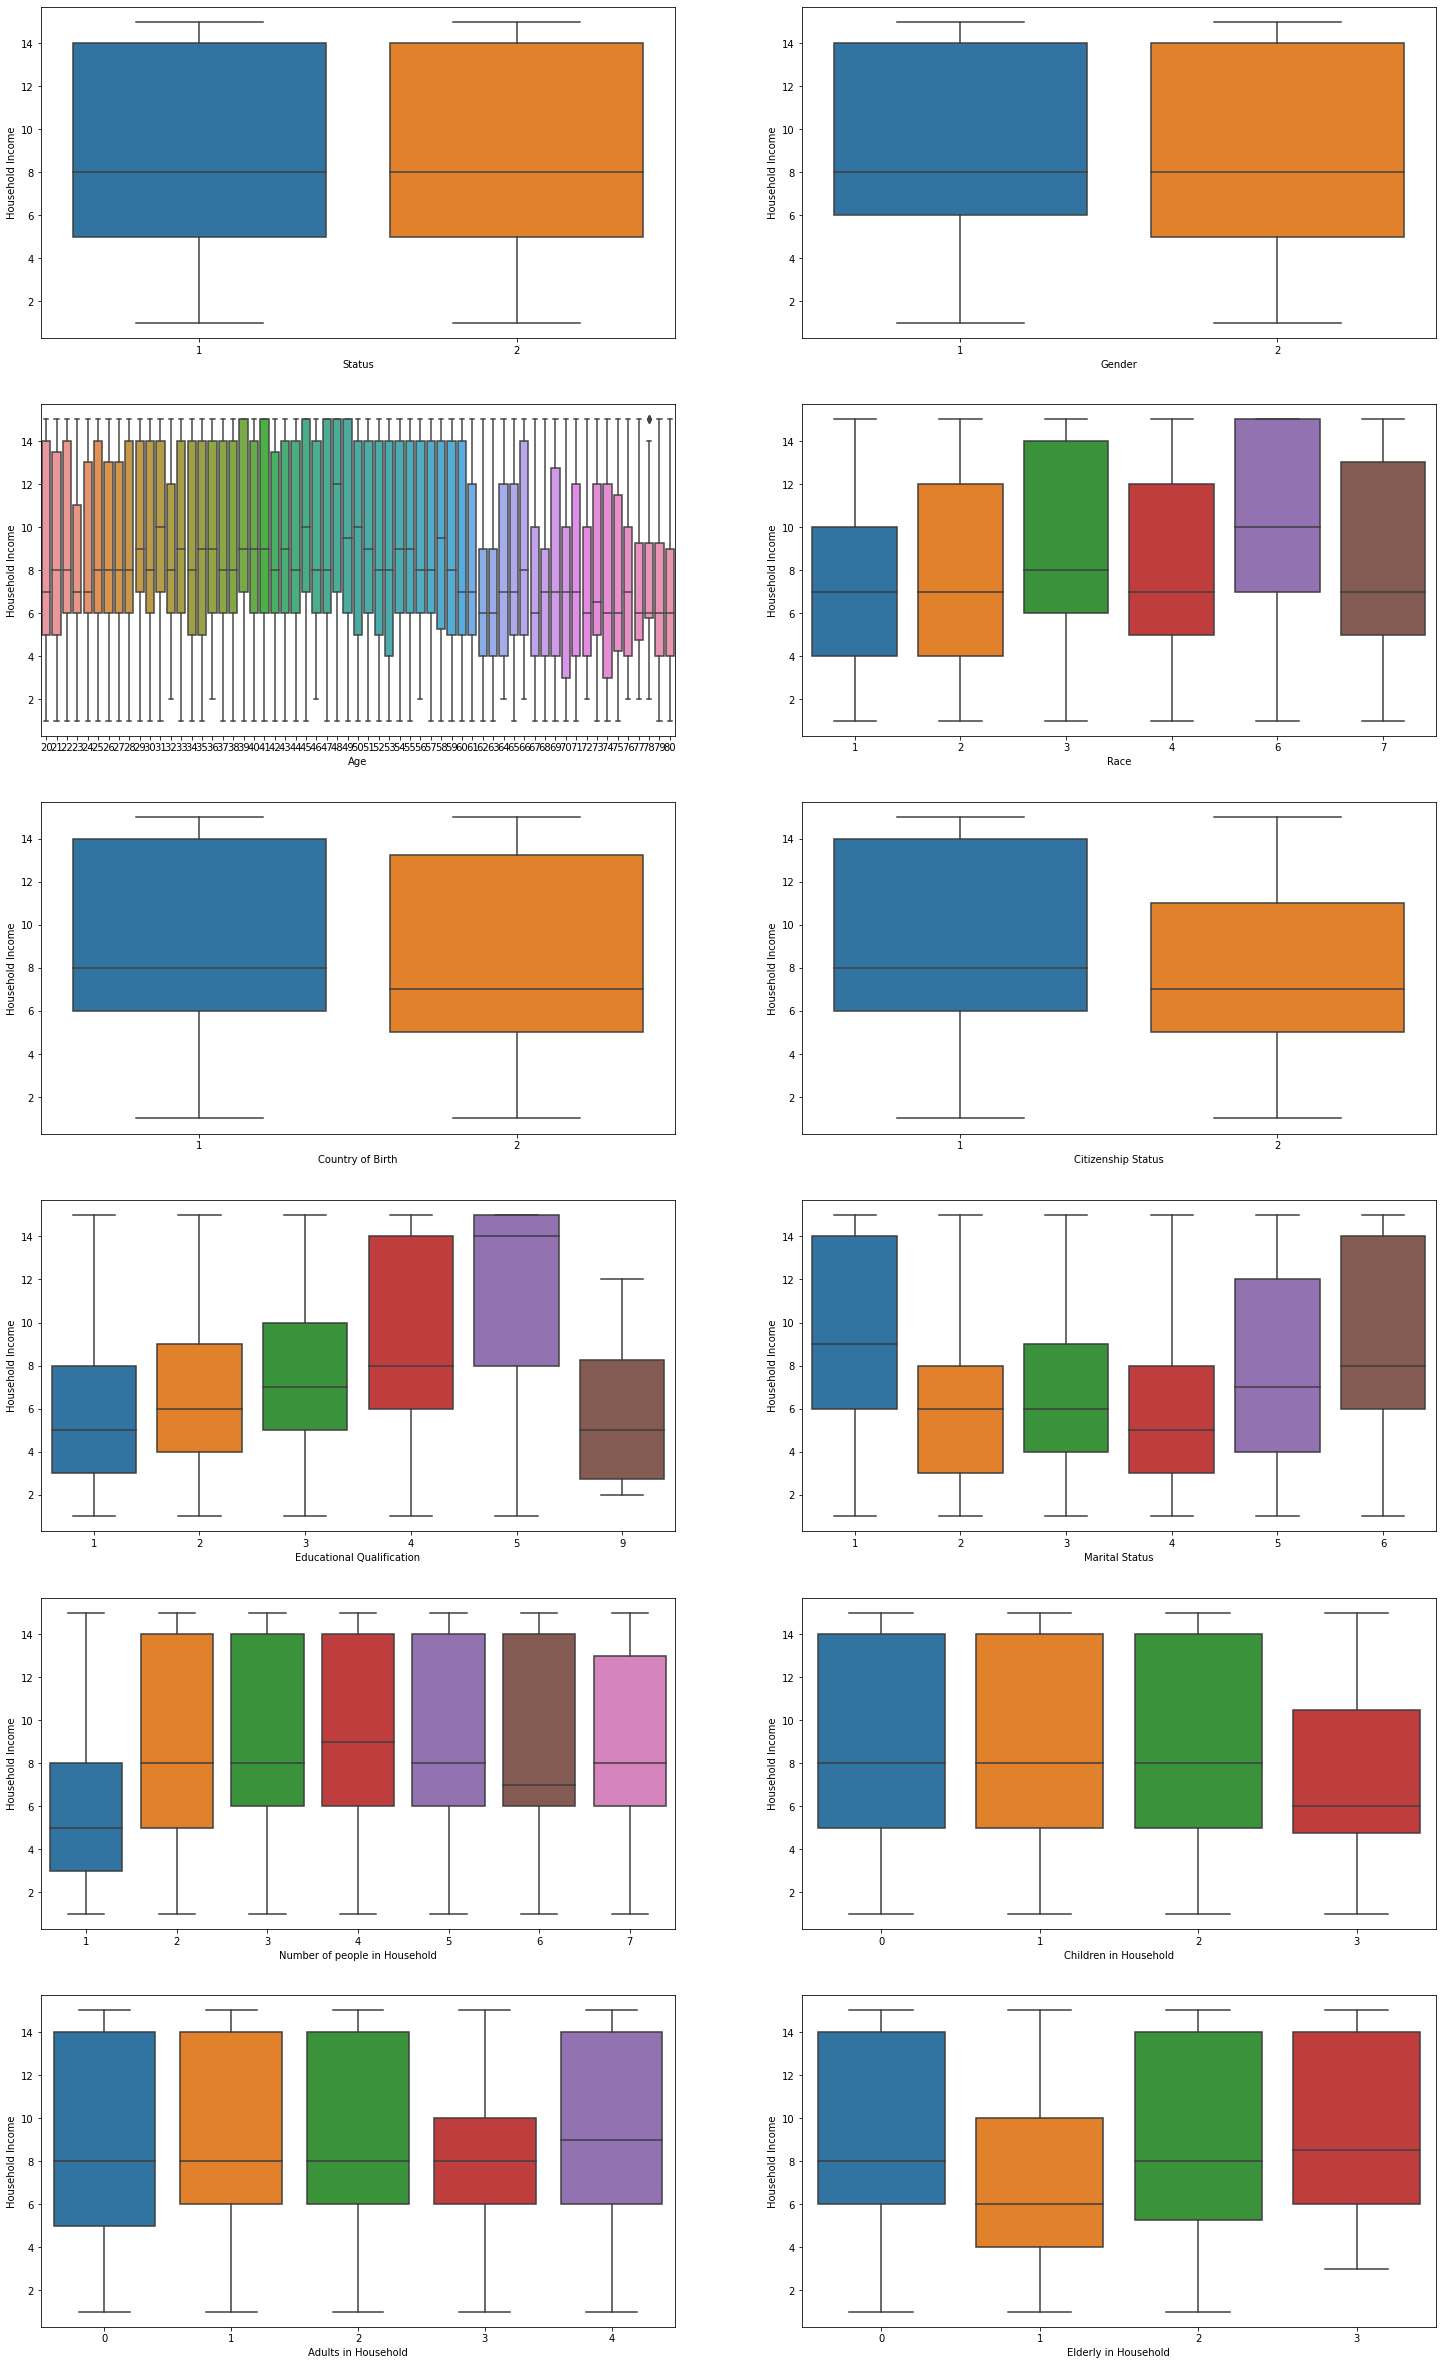

In [11]:
# Display the Price ranges of all feature columns
fig, ax = plt.subplots(figsize=(25,50))
for n, col in enumerate(df.columns[:-1]):  
    plt.subplot(7, 2, n+1)
    sns.boxplot(x=df[col],y=df['Household Income'],data=df)

In [12]:
# Extract the target and feature columns
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

# Spliting the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Displaying the train and test data shape
print("Train data:", X_train.shape)
print("Test data:", X_test.shape)

Train data: (3536, 12)
Test data: (1742, 12)


# Applying the Classifier Models

In [13]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.figure(figsize=(10,10))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

========== Decision tree ==========

Accuracy on validation set: 0.1814

Classification report : 
               precision    recall  f1-score   support

           1       0.09      0.12      0.10        34
           2       0.08      0.07      0.08        72
           3       0.20      0.19      0.20       112
           4       0.14      0.11      0.12       127
           5       0.11      0.15      0.13       104
           6       0.20      0.20      0.20       198
           7       0.15      0.15      0.15       168
           8       0.12      0.12      0.12       158
           9       0.15      0.10      0.12       125
          10       0.14      0.17      0.15        96
          12       0.14      0.14      0.14        63
          13       0.00      0.00      0.00        27
          14       0.16      0.20      0.18       157
          15       0.35      0.35      0.35       301

    accuracy                           0.18      1742
   macro avg       0.15      0.15  

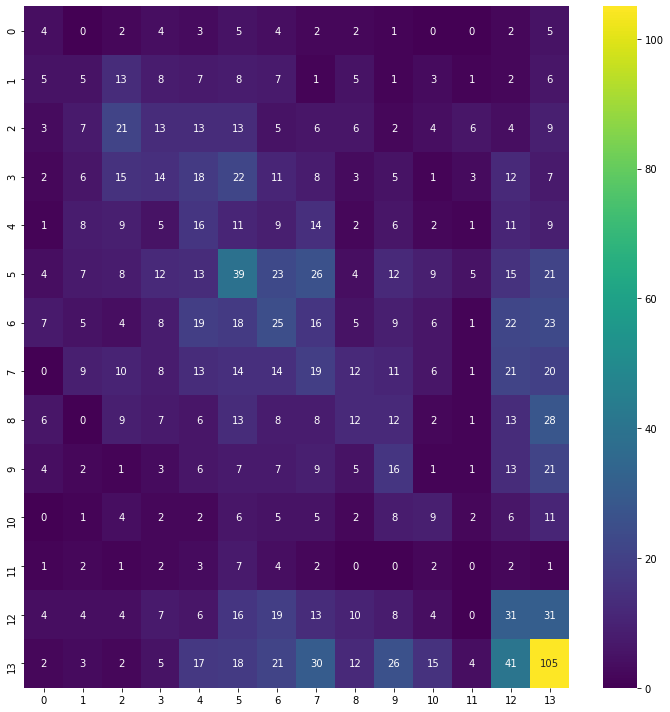

========== Random Forest ==========

Accuracy on validation set: 0.2227

Classification report : 
               precision    recall  f1-score   support

           1       0.21      0.15      0.17        34
           2       0.11      0.07      0.09        72
           3       0.17      0.20      0.18       112
           4       0.17      0.12      0.14       127
           5       0.17      0.21      0.19       104
           6       0.18      0.20      0.19       198
           7       0.17      0.21      0.19       168
           8       0.17      0.16      0.17       158
           9       0.24      0.14      0.17       125
          10       0.13      0.09      0.11        96
          12       0.20      0.17      0.19        63
          13       0.23      0.11      0.15        27
          14       0.20      0.21      0.20       157
          15       0.39      0.49      0.43       301

    accuracy                           0.22      1742
   macro avg       0.20      0.18  

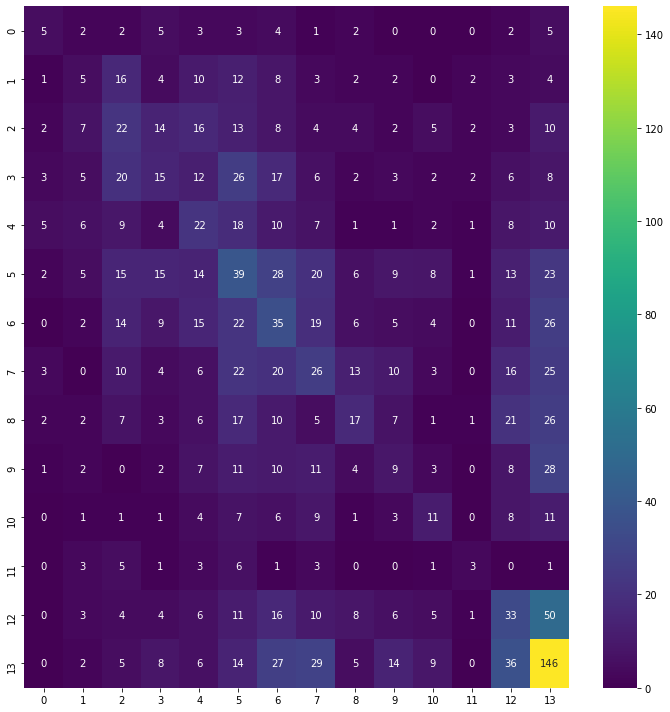

========== Naive Bayes ==========

Accuracy on validation set: 0.1848

Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        34
           2       0.33      0.01      0.03        72
           3       0.13      0.53      0.21       112
           4       0.00      0.00      0.00       127
           5       0.00      0.00      0.00       104
           6       0.10      0.10      0.10       198
           7       0.15      0.17      0.16       168
           8       0.11      0.01      0.01       158
           9       0.00      0.00      0.00       125
          10       0.00      0.00      0.00        96
          12       0.00      0.00      0.00        63
          13       0.00      0.00      0.00        27
          14       0.14      0.18      0.16       157
          15       0.27      0.61      0.37       301

    accuracy                           0.18      1742
   macro avg       0.09      0.12    

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


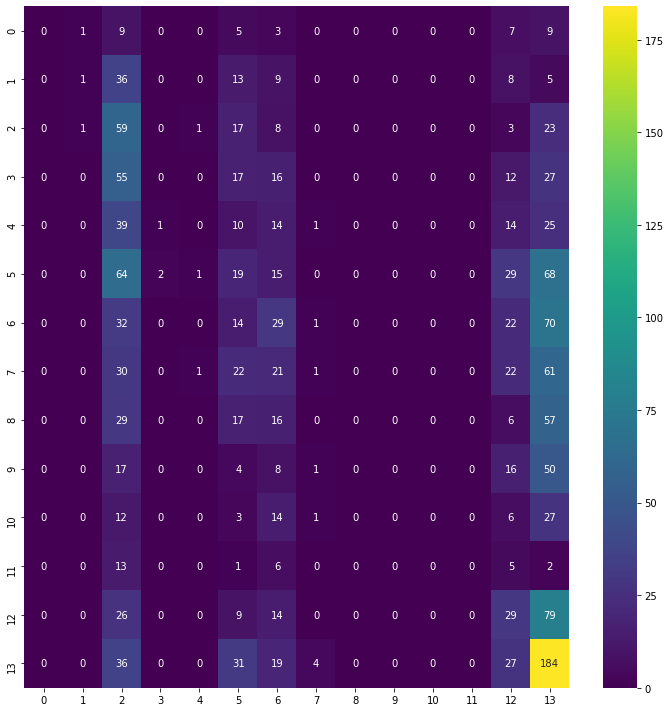

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in 

========== Logistic Regression ==========

Accuracy on validation set: 0.2101

Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.03      0.06        34
           2       0.00      0.00      0.00        72
           3       0.20      0.37      0.26       112
           4       0.10      0.02      0.04       127
           5       0.06      0.02      0.03       104
           6       0.17      0.25      0.21       198
           7       0.11      0.14      0.12       168
           8       0.33      0.02      0.04       158
           9       0.00      0.00      0.00       125
          10       0.00      0.00      0.00        96
          12       0.00      0.00      0.00        63
          13       0.00      0.00      0.00        27
          14       0.11      0.10      0.10       157
          15       0.27      0.76      0.40       301

    accuracy                           0.21      1742
   macro avg       0.17      

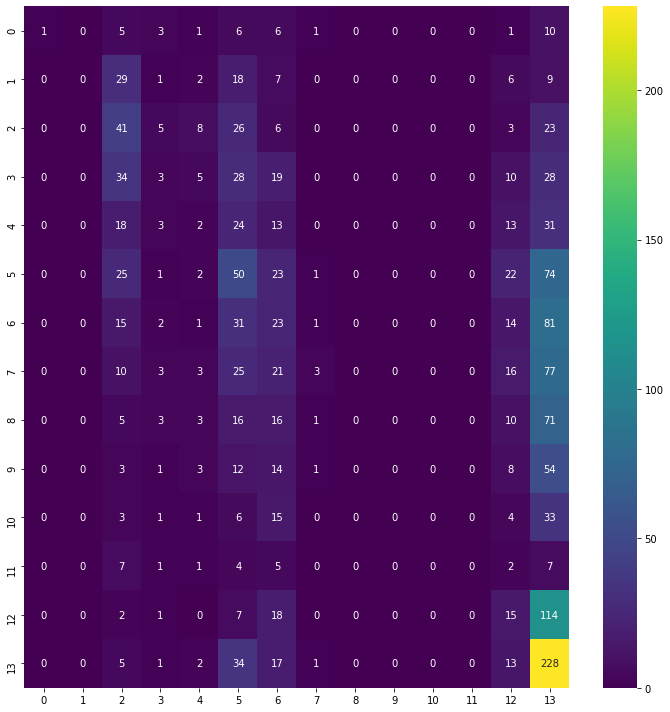

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== SVC ==========

Accuracy on validation set: 0.1860

Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00       112
           4       0.00      0.00      0.00       127
           5       0.00      0.00      0.00       104
           6       0.15      0.29      0.19       198
           7       0.00      0.00      0.00       168
           8       0.00      0.00      0.00       158
           9       0.00      0.00      0.00       125
          10       0.00      0.00      0.00        96
          12       0.00      0.00      0.00        63
          13       0.00      0.00      0.00        27
          14       0.00      0.00      0.00       157
          15       0.20      0.88      0.32       301

    accuracy                           0.19      1742
   macro avg       0.02      0.08      0.04  

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


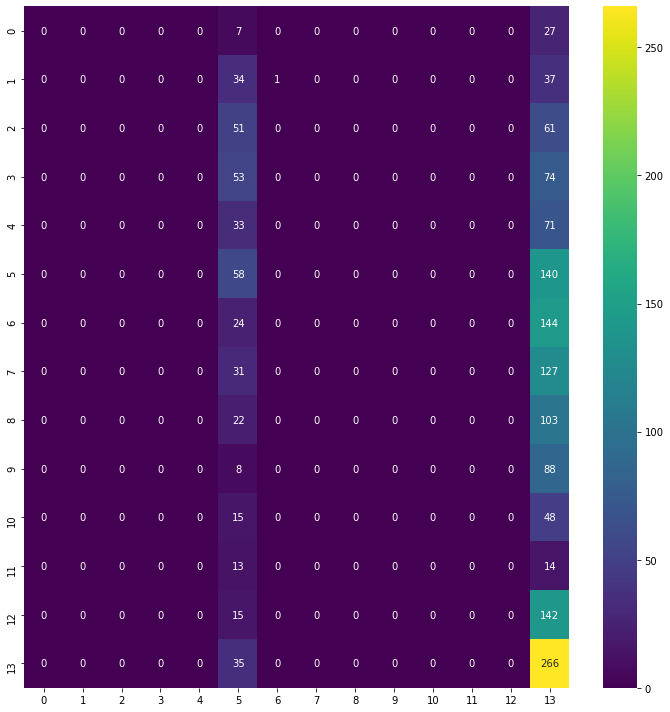

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== KNN Classifier ==========

Accuracy on validation set: 0.1860

Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00       112
           4       0.00      0.00      0.00       127
           5       0.00      0.00      0.00       104
           6       0.15      0.29      0.19       198
           7       0.00      0.00      0.00       168
           8       0.00      0.00      0.00       158
           9       0.00      0.00      0.00       125
          10       0.00      0.00      0.00        96
          12       0.00      0.00      0.00        63
          13       0.00      0.00      0.00        27
          14       0.00      0.00      0.00       157
          15       0.20      0.88      0.32       301

    accuracy                           0.19      1742
   macro avg       0.02      0.08 

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


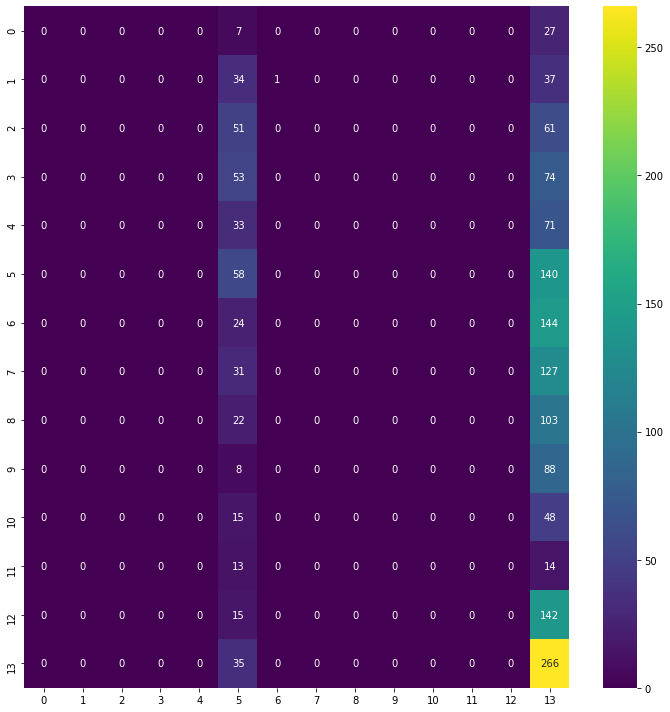

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# For Decision tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
result_dt = modelEvaluation(pred_dt, y_test, 'Decision tree')

# For Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
result_rf = modelEvaluation(pred_rf, y_test, 'Random Forest')

# Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)
pred_nb = nb_model.predict(X_test)
results_nb = modelEvaluation(pred_nb, y_test, 'Naive Bayes')

# For Logistic Regression Classifier
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
results_lr = modelEvaluation(pred_lr, y_test, 'Logistic Regression')

# For State Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
pred_svc = svc_model.predict(X_test)
results_svc = modelEvaluation(pred_svc, y_test, 'SVC')

# For KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
pred_knn = svc_model.predict(X_test)
results_knn = modelEvaluation(pred_knn, y_test, 'KNN Classifier')

**Models Evaluation**

In [15]:
from tabulate import tabulate
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' : result_dt,
    'Random Forest' : result_rf,
    'Naive Bayes' : results_nb,
    'Logistic Regression' : results_lr,
    'SVC': results_svc,
    'KNN Classifier':results_knn
    
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

+-----------+-----------------+-----------------+---------------+-----------------------+-----------+------------------+
| Metrics   |   Decision tree |   Random Forest |   Naive Bayes |   Logistic Regression |       SVC |   KNN Classifier |
|-----------+-----------------+-----------------+---------------+-----------------------+-----------+------------------|
| accuracy  |        0.181401 |        0.222732 |     0.184845  |             0.210103  | 0.185993  |        0.185993  |
| precision |        0.146347 |        0.195455 |     0.0883995 |             0.169072  | 0.0245411 |        0.0245411 |
| recall    |        0.146894 |        0.180225 |     0.115114  |             0.121412  | 0.0840464 |        0.0840464 |
| f1-score  |        0.145379 |        0.183272 |     0.0742417 |             0.0895378 | 0.0370073 |        0.0370073 |
+-----------+-----------------+-----------------+---------------+-----------------------+-----------+------------------+


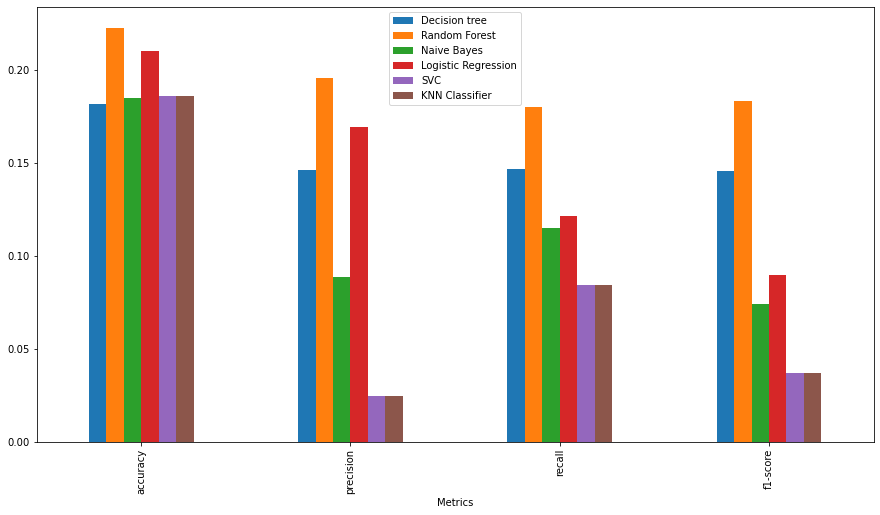

In [16]:
metrics_df.plot(kind='bar', figsize=(15,8))
plt.show()

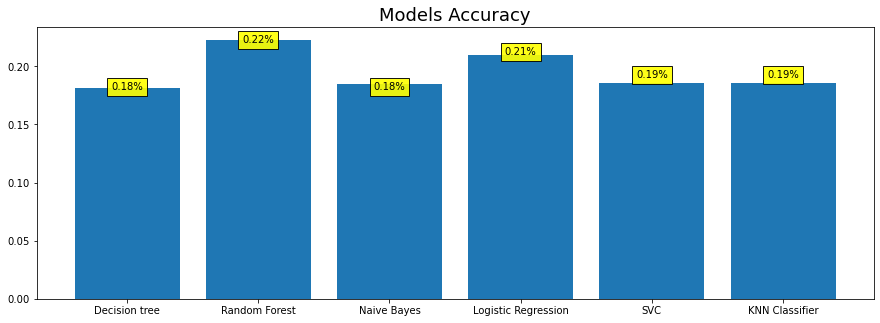

In [17]:
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()

# Applying the Regressor Model

In [18]:
def model_evaluator(model , X_train, y_train, X_test, y_test):
    # Train a model
    model.fit(X_train, y_train)
    
    # Make a prediction
    y_pred = model.predict(X_test)
    
    # calculate the model's score
    model_score = model.score(X_train, y_train)
    
    # calculate the r2score
    score_r2 = r2_score(y_test, y_pred)
    
    # calculate the MSE
    mse = np.round(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred))), 4)
    
    # Cross Validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Model Accuracy
    model_accuracy = cv_scores.mean()
    
    return [model_score, score_r2, mse, model_accuracy] 

In [19]:
# Applying Knn
knn = KNeighborsRegressor(n_neighbors = 5)
knn_results = model_evaluator(knn , X_train, y_train, X_test, y_test)

# Linear Regression
lr = LinearRegression()
lr_results = model_evaluator(lr , X_train, y_train, X_test, y_test)

# Decision Tree
dtr = DecisionTreeRegressor()
dtr_results = model_evaluator(dtr , X_train, y_train, X_test, y_test)

# Random Forest
rfr = RandomForestRegressor()
rfr_results = model_evaluator(rfr , X_train, y_train, X_test, y_test)

# SVR Linear
svr_linear = SVR(kernel='linear')
svr_linear_results = model_evaluator(svr_linear , X_train, y_train, X_test, y_test)

# SVR poly
svr_poly = SVR(kernel='poly')
svr_poly_results = model_evaluator(svr_poly , X_train, y_train, X_test, y_test)

In [20]:
from tabulate import tabulate
# showing all models result
dic = {
    'Metrics':["Model Score", "R2 Score", "MSE", "Model Accuracy"],
    'KNN' : knn_results,
    'Linear Regression':lr_results,
    'Random Forest Regressor':rfr_results,
    'Decision Tree Regressor':dtr_results,
    'SVR Linear':svr_linear_results,
    'SVR Poly':svr_poly_results  
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')

# displaying the DataFrame
metrics_df.T

Metrics,Model Score,R2 Score,MSE,Model Accuracy
KNN,0.453234,0.140074,1.343999e+06,0.162978
Linear Regression,0.268660,0.210946,1.450299e+06,0.263272
Random Forest Regressor,0.877219,0.220624,1.303443e+06,0.276005
Decision Tree Regressor,0.967441,-0.307167,1.490391e+06,-0.230742
SVR Linear,0.253194,0.196003,1.777225e+06,0.246592
SVR Poly,0.149108,0.131895,1.438822e+06,0.142990


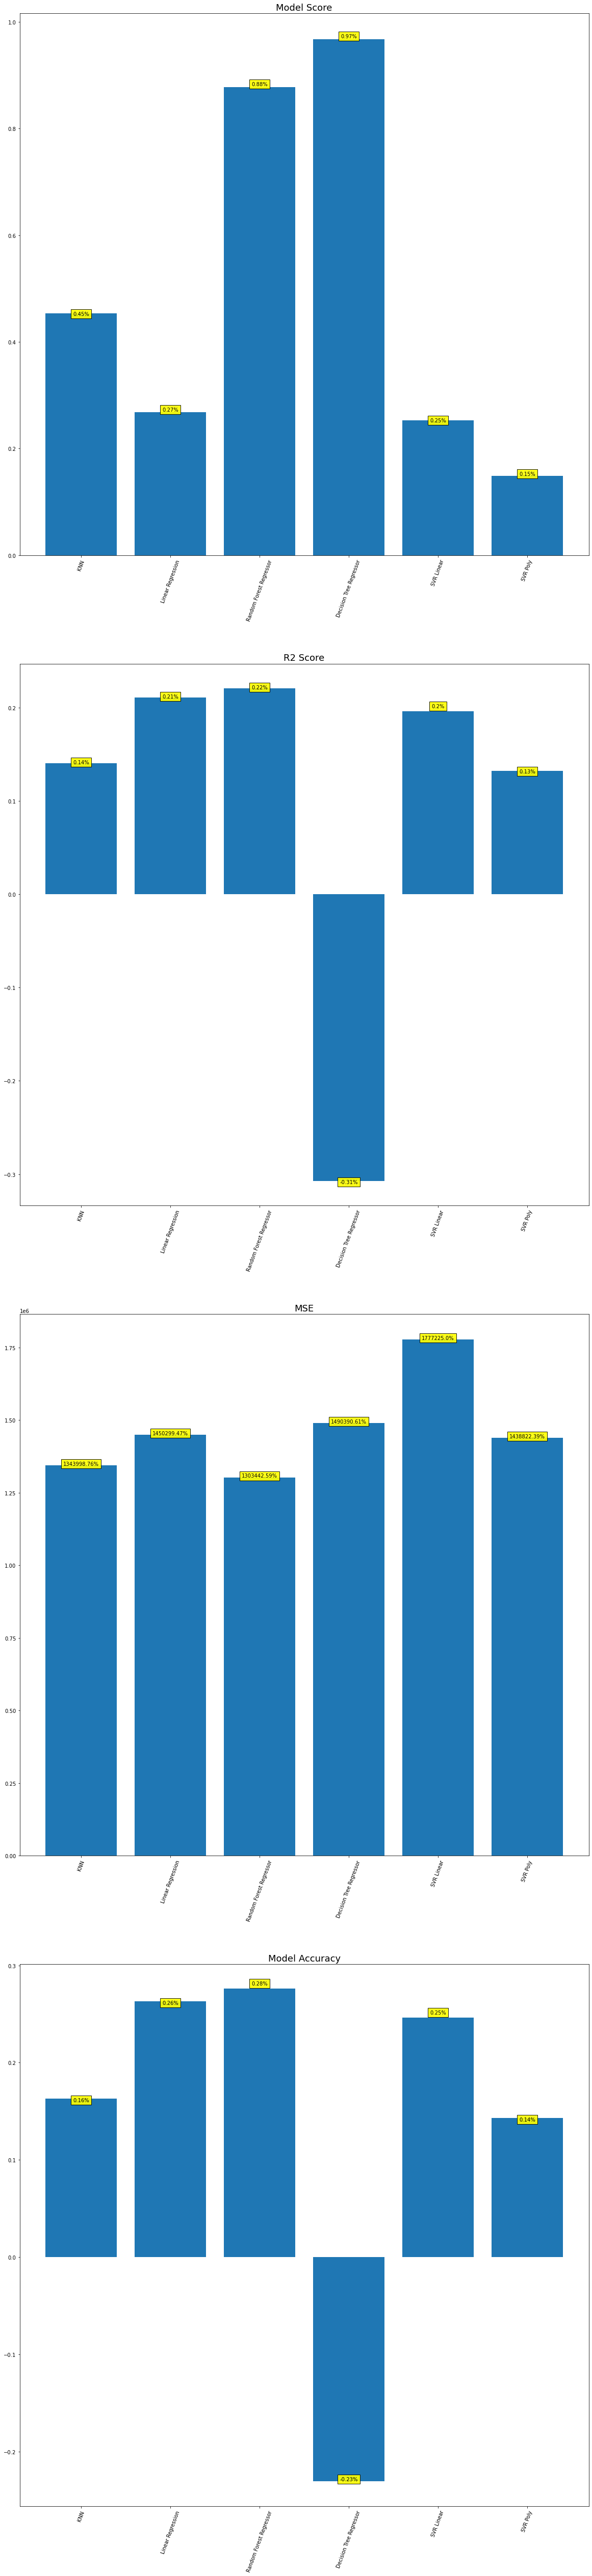

In [21]:
plt.figure(figsize = (20,90))
for n, col in enumerate(metrics_df.T.columns):
    plt.subplot(4, 1, n + 1)
    models_acc   = metrics_df.iloc[n].tolist()
    models_names = metrics_df.columns.tolist()
    plt.bar(models_names, models_acc)
    plt.xticks(rotation = 70)
    plt.title(col, fontsize=18)

    def addLabels(names,acc):
        for i in range(len(names)):
            plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

    addLabels(models_names,models_acc)

# Results Discussion

Here in this problem we have the dataset on which we have to predict the 'Household Income'. So we first applied the model as a classifier and then as a regressor probelm and we evaluate the model performance and compare them for best model selection. So first we take the following models for the model application.
* KNN
* Liner Model
* Decision tree 
* SVM 
* Naive Bayes
* Random Forest

So what we observe when the models taken as the Classifier

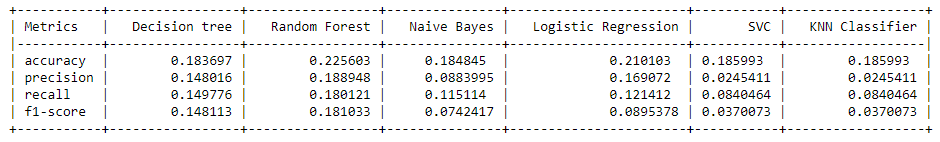

So in this table we can compare the best model for the accuracy of the model. So that the best in classification case is the Random Forest Classifier that have the accuracy of 23% but this is not enough So we move the model to test as the Regressor model.

Here we take the models as the Regressor Model and here are Regressor model results.

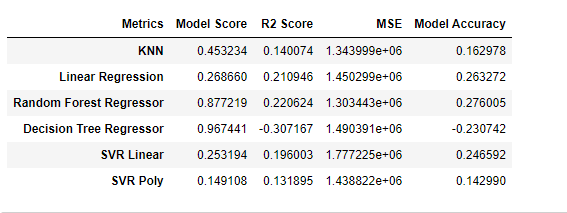

So from the comparison of the model scores we come to know that the best model for this problem is the decision tree Regressor that have the score of the 97% so that we can take this model as the best solution for this preoblem.